In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
%matplotlib inline

### Loading Dataset

In [2]:
iris_data = load_iris()

In [3]:
dataset = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)

In [4]:
dataset.shape

(150, 4)

### Scaling the dataset

In [5]:
scaler = StandardScaler()

In [6]:
X_scaled = scaler.fit_transform(dataset)

In [7]:
X_scaled.shape

(150, 4)

### Reducing Dimension using PCA

In [8]:
pca = PCA(n_components = 2)

In [9]:
X_scaled_reduced = pca.fit_transform(X_scaled)

In [10]:
X_scaled_reduced.shape

(150, 2)

### Visualising the dataset

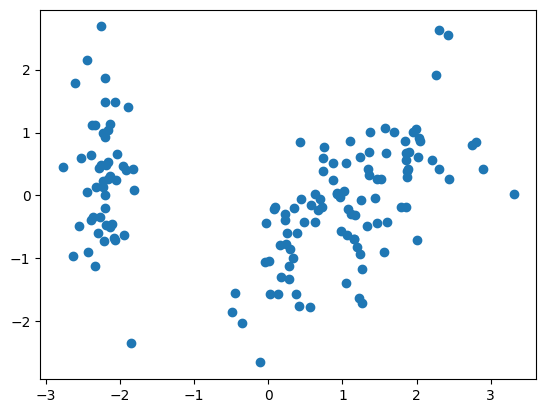

In [11]:
plt.scatter(X_scaled_reduced[:, 0], X_scaled_reduced[:, 1])
plt.show()

### Constructing dendrogram

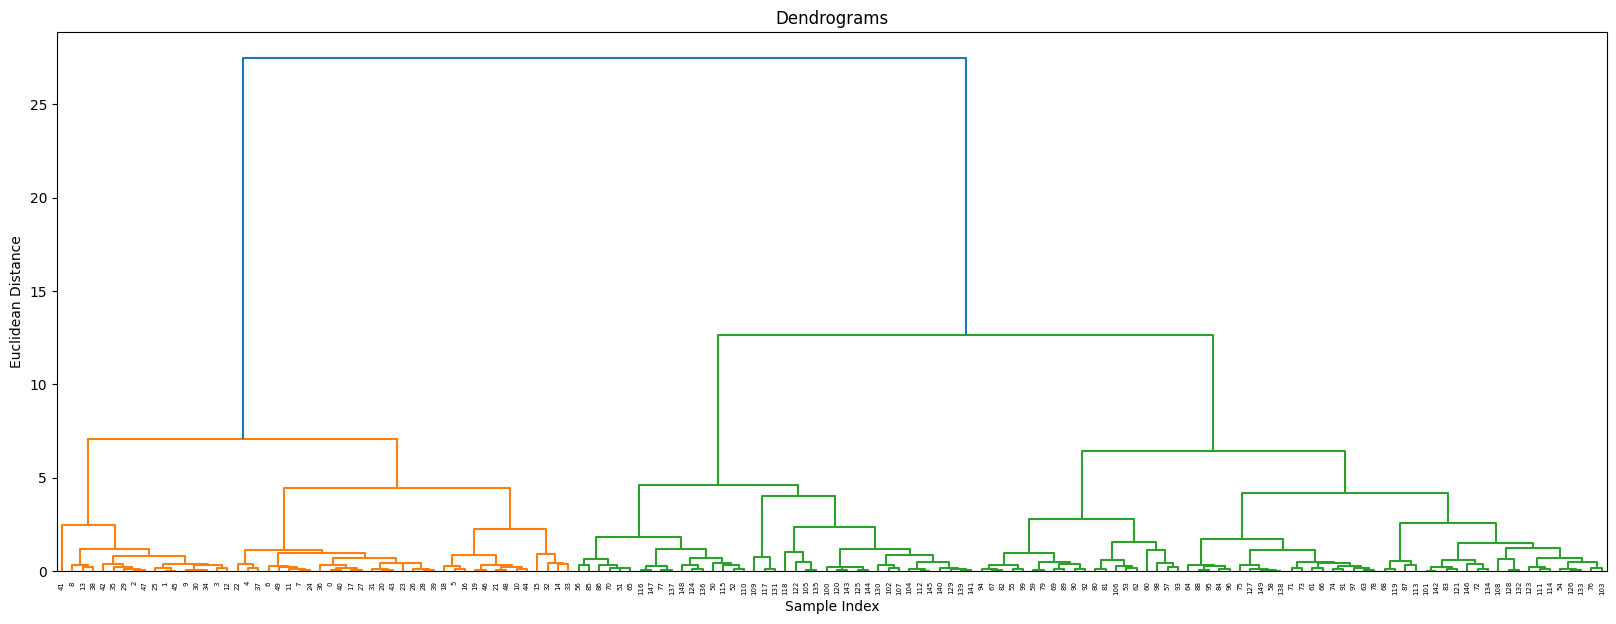

In [12]:
plt.figure(figsize = (20, 7))
plt.title('Dendrograms')

dendrogram(linkage(X_scaled_reduced, method = 'ward'))
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

### Model Training

In [13]:
agglomerative_clustering = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
agglomerative_clustering.fit(X_scaled_reduced)

AgglomerativeClustering(metric='euclidean')

### Visualising clusters

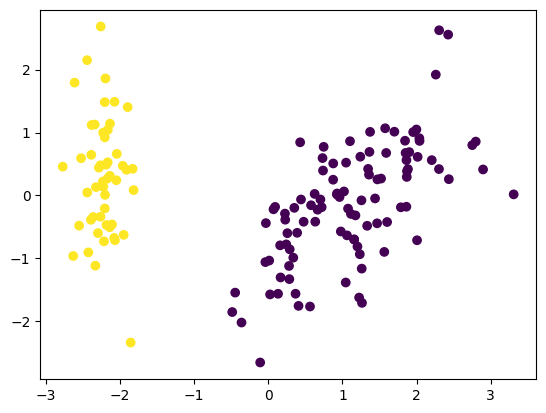

In [14]:
plt.scatter(X_scaled_reduced[:, 0], X_scaled_reduced[:, 1], c = agglomerative_clustering.labels_)
plt.show()

### Silhouette Score

In [15]:
silhouette_coefficients = []
for k in range(2, 11):
    agglomerative_clustering = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage = 'ward')
    agglomerative_clustering.fit(X_scaled_reduced)
    score = silhouette_score(X_scaled_reduced, agglomerative_clustering.labels_)
    silhouette_coefficients.append(score)

In [16]:
silhouette_coefficients

[0.6145202036230449,
 0.5110595988766189,
 0.4487350420958893,
 0.4041689631006268,
 0.36721128895830735,
 0.3706820678912667,
 0.3930552606912112,
 0.4183694466469873,
 0.40542056288894923]

### Plotting silhouette scores

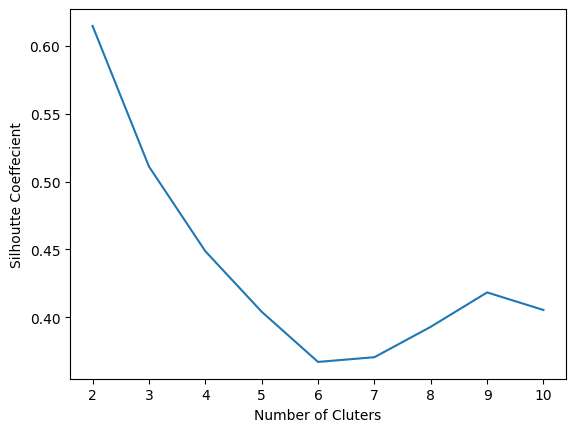

In [17]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()